In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

### raw data 

In [2]:
df = pd.read_csv("JD_phones.csv")
df.drop(df.columns[0],axis=1,inplace=True) # 删除第一列
df.head(10) #显示部分数据

,comment,coupon,name,price,shop
0,89万+,自营,荣耀9i 4GB+64GB 幻夜黑 移动联通电信4G全面屏手机 双卡双待,1199.0,荣耀京东自营旗舰店
1,102万+,"自营,券6000-300",Apple iPhone X (A1865) 64GB 深空灰色 移动联通电信4G手机,6999.0,京东Apple产品专营店
2,106万+,自营,Apple iPhone 8 64GB 红色特别版 移动联通电信4G手机,5099.0,京东Apple产品专营店
3,80万+,"自营,券1980-100",荣耀10 GT游戏加速 AIS手持夜景 6GB+64GB 幻影蓝全网通 移动联通电信4G 双...,2199.0,荣耀京东自营旗舰店
4,5.2万+,自营,OPPO Find X曲面全景屏 波尔多红 8GB+128GB 全网通 移动联通电信全网通4...,4999.0,OPPO京东自营官方旗舰店
5,46万+,自营,华为 HUAWEI P20 AI智慧徕卡双摄全面屏游戏手机 6GB+64GB 极光色 全网通...,3388.0,华为京东自营官方旗舰店
6,12万+,"自营,赠",黑鲨游戏手机 8GB+128GB 极夜黑 液冷更快 全网通4G 双卡双待,2999.0,黑鲨京东自营官方旗舰店
7,28万+,自营,华为 HUAWEI P20 Pro 全面屏徕卡三摄游戏手机 6GB+128GB 极光色 全网...,4988.0,华为京东自营官方旗舰店
8,39万+,"自营,券500-20",vivo Z1极光特别版 新一代全面屏AI双摄手机 4GB+64GB 移动联通电信全网通4G,1398.0,vivo京东自营官方旗舰店
9,15万+,自营,华为 HUAWEI nova 3全面屏高清四摄游戏手机 6GB+128GB 亮黑色 全网通移...,2799.0,华为京东自营官方旗舰店


### 1. The ratio between Jingdong self-operated stores and non-self-operated stores
The pie chart shows data about the rate between JingDong self-operated stores and non-self-operated stores.
we could see that in all phone-selling shops, JD self-run shops share over 40 percent in online platform market, while other shops account for 59.25 percent in total.

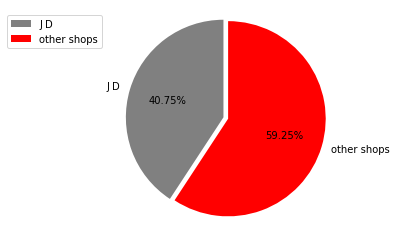

In [3]:
# 京东自营店与非自营店各自占比
self = 0
others = 0
for i in df['coupon']:
    if '自营' in str(i):
        self += 1
    else:
        others += 1

# 饼状图1
plt.figure(figsize=(4,4))
labels = [u'J D', u'other shops']
sizes = [self,others]
colors = ['gray','red']
explode = (0.05,0)
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False,
                      startangle =90,
                      pctdistance = 0.6) #数值距圆心半径倍数距离
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(-0.5, 1))
plt.show()

### 2. The ratio of shops with coupons to shops without activities
The bar chart below shows data that only small numbers of shops has discount, most of shops don't have discount on smartphones.

In [4]:
# 有券（优惠）的店与无活动的店占比
coupon = 0
other = 0
for i in df['coupon']:
    if '券' in str(i):
        coupon += 1
    else:
        other += 1

# 柱状图1
data = [go.Bar(
            x=['coupon', 'other'],
            y=[coupon, other]
    )]

py.iplot(data, filename='Discount')

# # or饼状图2
# plt.figure(figsize=(4,4))
# labels1 = [u'coupon', u'others']
# sizes1 = [coupon,other]
# colors1 = ['gray','red']
# explode1 = (0.2,0)
# patches,text1,text2 = plt.pie(sizes1,
#                       explode=explode1,
#                       labels=labels1,
#                       colors=colors1,
#                       autopct = '%3.2f%%', 
#                       shadow = False, 
#                       startangle =90, 
#                       pctdistance = 0.6)
# plt.axis('equal')
# plt.legend(loc='upper left', bbox_to_anchor=(-0.5, 1))
# plt.show()

### 3. The most popular Top 10 phones
We assume that the more reviews from consumers, the phone is more popular for consumers.

According to the customer reviews under each phone from different brands, we screen out 10 phones which are most popular for consumers. 

The best seller is 'Apple iPhone 8 Plus 64GB 红色特别版'. We could find that all Top 3 phones are from Apple, although the prices are higher than other brand's phones. Following are ‘Honour’ from Huawei.

In [5]:
# 将原评论数据转换为纯数字型，并按评论数由高至低排序（体现购买的热度）
comments = []
for i in df['comment']:
    if '万+' in i:  
        a = i.replace('万+','')
        a = float(a) *10000
    else:
        a = i.replace('+','')
    comments.append(int(a))
df['comments'] = comments
df1 = df.sort_values(by='comments', ascending=False)[:10]
df1

,comment,coupon,name,price,shop,comments
11,149万+,自营,Apple iPhone 8 Plus 64GB 红色特别版 移动联通电信4G手机,5999.0,京东Apple产品专营店,1490000
2,106万+,自营,Apple iPhone 8 64GB 红色特别版 移动联通电信4G手机,5099.0,京东Apple产品专营店,1060000
1,102万+,"自营,券6000-300",Apple iPhone X (A1865) 64GB 深空灰色 移动联通电信4G手机,6999.0,京东Apple产品专营店,1020000
0,89万+,自营,荣耀9i 4GB+64GB 幻夜黑 移动联通电信4G全面屏手机 双卡双待,1199.0,荣耀京东自营旗舰店,890000
16,89万+,"自营,券1580-200",荣耀 V10 高配版 6GB+64GB 幻夜黑 移动联通电信4G全面屏游戏手机 双卡双待,1999.0,荣耀京东自营旗舰店,890000
73,89万+,自营,荣耀 V10 尊享版 6GB+128GB 幻夜黑 移动联通电信4G全面屏游戏手机 双卡双待,2799.0,荣耀京东自营旗舰店,890000
51,85万+,自营,Apple iPhone 7 Plus (A1661) 128G 黑色 移动联通电信4G手机,5599.0,京东Apple产品专营店,850000
3,80万+,"自营,券1980-100",荣耀10 GT游戏加速 AIS手持夜景 6GB+64GB 幻影蓝全网通 移动联通电信4G 双...,2199.0,荣耀京东自营旗舰店,800000
34,71万+,自营,小米8 全面屏游戏智能手机 6GB+64GB 黑色 全网通4G 双卡双待,2499.0,小米京东自营旗舰店,710000
18,71万+,自营,小米8 全面屏游戏智能手机 6GB+64GB 蓝色 全网通4G 双卡双待,2499.0,小米京东自营旗舰店,710000


#### (1) Cost performance
Cost performance means comments divided by price.

As we can see from the green line, althoght Apple sells best, the general cost performace of Apple is lower than Huawei and Xiaomi. '荣耀9i 4GB+64GB 幻夜黑' Performs best in cost performance.

In [6]:
random_x = df1['name']
random_y0 = df1['comments']/200
random_y1 = df1['price']
random_y2 = df1['comments']/df1['price']*10

# Create a trace
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'lines+markers',
    name = 'comments'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'price'
)

trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'lines+markers',
    name = 'Cost performance'
)

data = [trace0, trace1,trace2]
py.iplot(data, filename='line-mode')

#### (2) The distribution of brands in the top ten mobile phones
There are only three brands in top10 mobile phones. Apple and Huawei have equal shares in Top10 online platform market, accout for 40% respectively. And Xiaomi has relatively less shares, is about 20%.

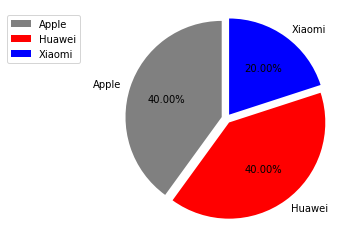

In [7]:
# 热度前十手机的品牌的占比分布
Apple = 0
Huawei = 0
Xiaomi = 0
for i in df1['name']:
    if 'Apple' in str(i):
        Apple += 1
    elif '荣耀' in str(i):
        Huawei += 1
    else:
        Xiaomi += 1
        
# 饼状图3
plt.figure(figsize=(4,4))
labels = [u'Apple', u'Huawei', u'Xiaomi']
sizes = [Apple,Huawei,Xiaomi]
colors = ['gray','red','blue']
explode = (0.05,0.05,0.05)
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%',
                      shadow = False,
                      startangle =90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(-0.5, 1))
plt.show()